Training Set Evaluation Metrics:
MSE: 0.0001
RMSE: 0.0099
MAE: 0.0048
R-squared: 0.9941

Validation Set Evaluation Metrics:
MSE: 0.0011
RMSE: 0.0336
MAE: 0.0104
R-squared: 0.8953

Test Set Evaluation Metrics:
MSE: 0.0003
RMSE: 0.0180
MAE: 0.0107
R-squared: 0.9764


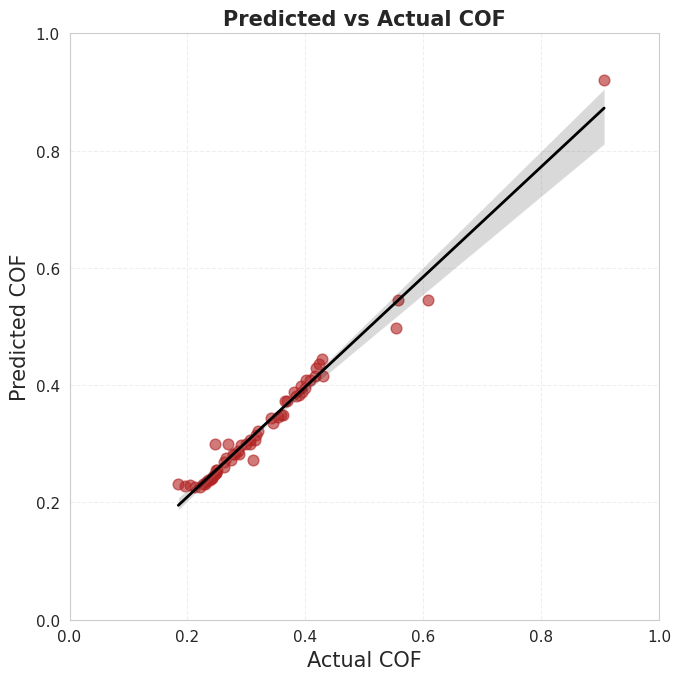

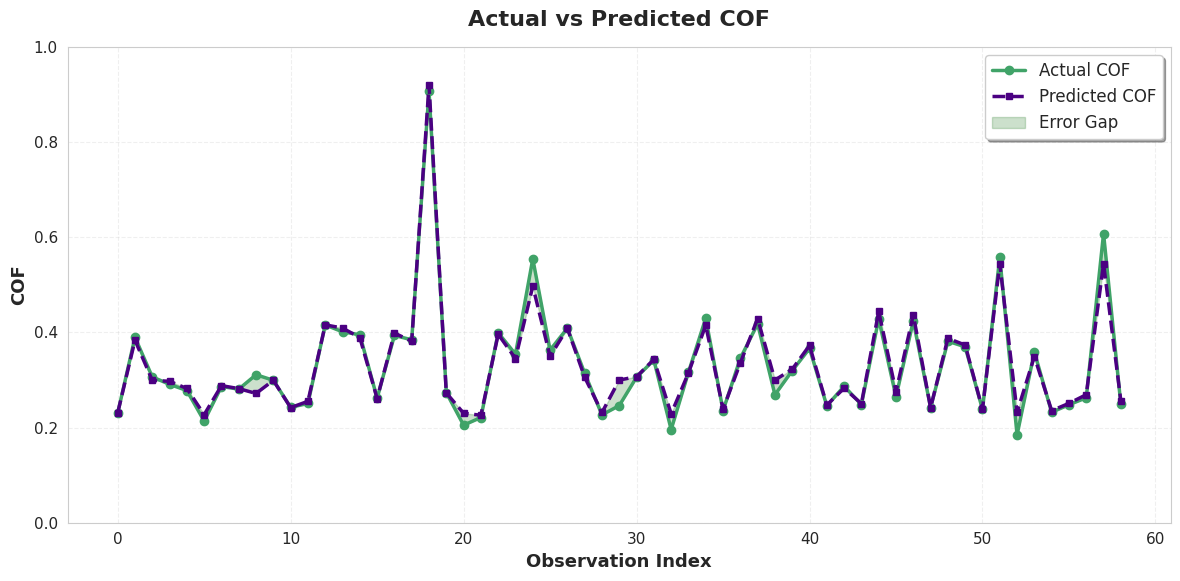

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('CoF.xlsx')
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Separate features and target
X_train = train_df.drop(columns=['COF'])
y_train = train_df['COF']
X_val = val_df.drop(columns=['COF'])
y_val = val_df['COF']
X_test = test_df.drop(columns=['COF'])
y_test = test_df['COF']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        max_features='sqrt',
        random_state=42)
    )
])

# Train on 70% train set
pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Evaluation Metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R-squared: {train_r2:.4f}\n")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation Metrics:")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R-squared: {val_r2:.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Evaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# -------------------- Visualization Settings --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# -------------------- Plot 1: Predicted vs Actual --------------------
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#B22222'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual COF")
plt.ylabel("Predicted COF")
plt.title("Predicted vs Actual COF", fontsize=15, weight='bold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------- Plot 2: Observation Line Plot --------------------
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual COF",
    marker='o', markersize=6, linewidth=2.5,
    color='#40A368'
)

plt.plot(
    obs_index, y_pred,
    label="Predicted COF",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#4B0082'
)

plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("COF", fontsize=13, weight='bold')
plt.title("Actual vs Predicted COF", fontsize=16, weight='bold', pad=15)
plt.ylim(0, 1)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Training Set Evaluation Metrics:
MSE: 0.00000023
RMSE: 0.00048013
MAE: 0.00031823
R² Score: 0.9986
Validation Set Evaluation Metrics:
MSE: 0.0000
RMSE: 0.0017
MAE: 0.0010
R-squared: 0.9816


Test Set Evaluation Metrics:
MSE: 0.00000117
RMSE: 0.00107943
MAE: 0.00078898
R² Score: 0.9927


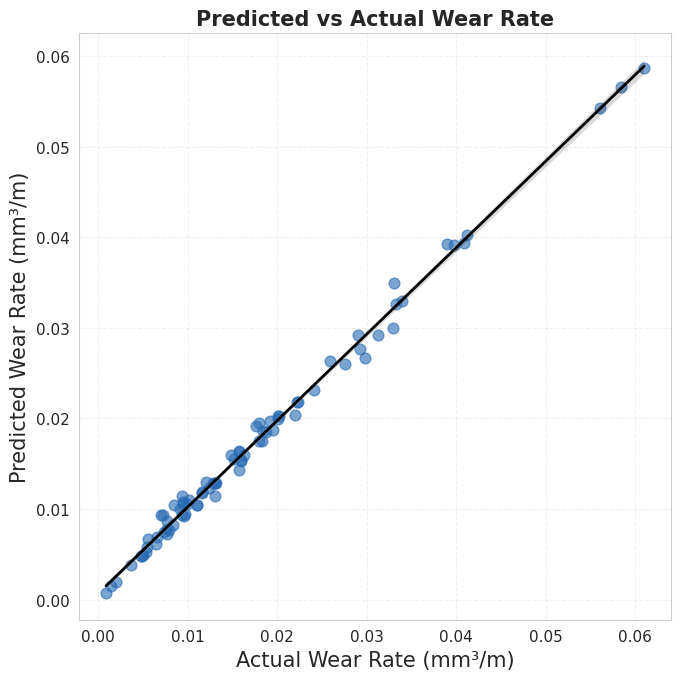

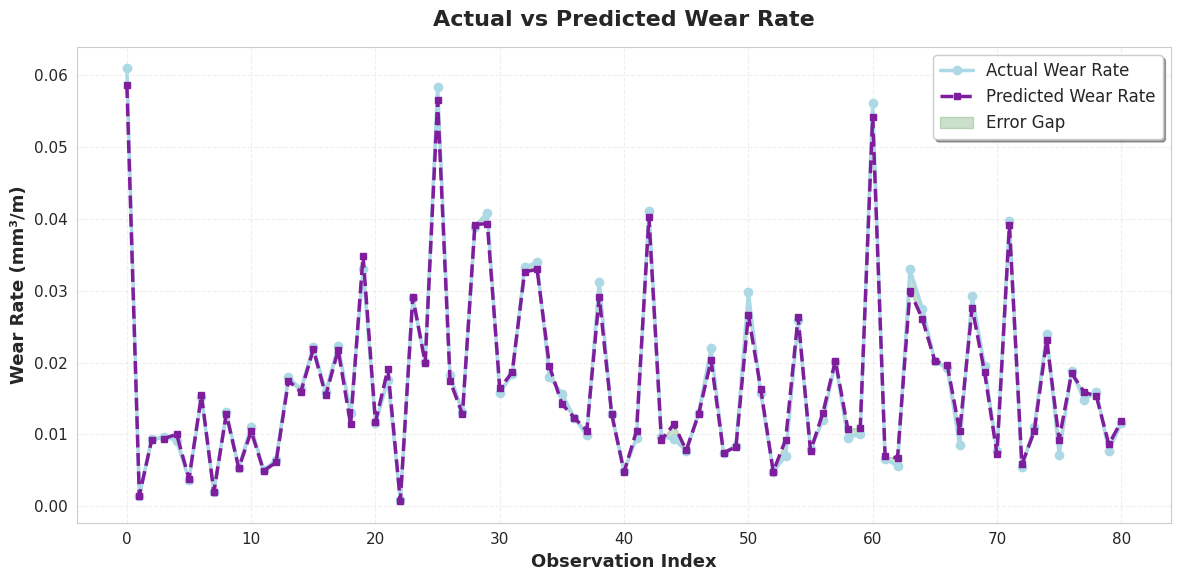

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('Wear_rate.xlsx')  # Adjust path if necessary
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Define features and target
X_train = train_df.drop(columns=['Wear rate (mm3/m)'])
y_train = train_df['Wear rate (mm3/m)']
X_val = val_df.drop(columns=['Wear rate (mm3/m)'])
y_val = val_df['Wear rate (mm3/m)']
X_test = test_df.drop(columns=['Wear rate (mm3/m)'])
y_test = test_df['Wear rate (mm3/m)']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        max_features='sqrt',
        random_state=42)
    )
])
pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Evaluation Metrics:")
print(f"MSE: {train_mse:.8f}")
print(f"RMSE: {train_rmse:.8f}")
print(f"MAE: {train_mae:.8f}")
print(f"R² Score: {train_r2:.4f}")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation Metrics:")
print(f"MSE: {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE: {val_mae:.4f}")
print(f"R-squared: {val_r2:.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation Metrics:")
print(f"MSE: {mse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"MAE: {mae:.8f}")
print(f"R² Score: {r2:.4f}")

# -------------------- Visualization --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# ---- Plot 1: Predicted vs Actual ----
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#276AB3'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual Wear Rate (mm³/m)")
plt.ylabel("Predicted Wear Rate (mm³/m)")
plt.title("Predicted vs Actual Wear Rate", fontsize=15, weight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Plot 2: Line Plot of Observations ----
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual Wear Rate",
    marker='o', markersize=6, linewidth=2.5,
    color='#ADD8E6'
)
plt.plot(
    obs_index, y_pred,
    label="Predicted Wear Rate",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#7E1E9C'
)
plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("Wear Rate (mm³/m)", fontsize=13, weight='bold')
plt.title("Actual vs Predicted Wear Rate", fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
